In [1]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
path1 = 'C:/Users/MYTHILI/Downloads/archive (5)/samples/2n73f.png'
path2 = 'C:/Users/MYTHILI/Downloads/archive (5)/samples/2ycn8.png'

In [3]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')
    

In [4]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

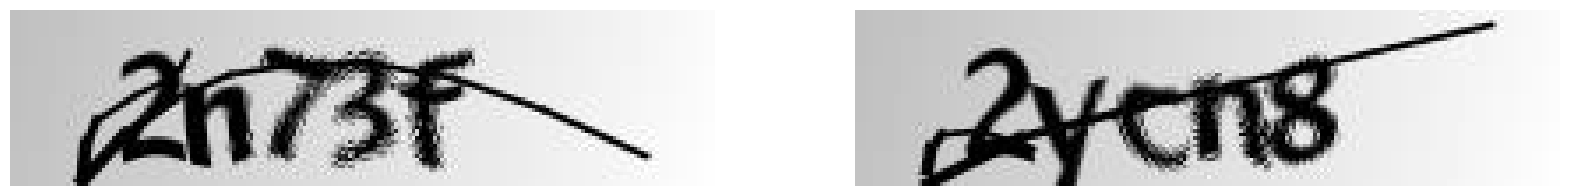

In [5]:
plot_(img1, img2)

In [6]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

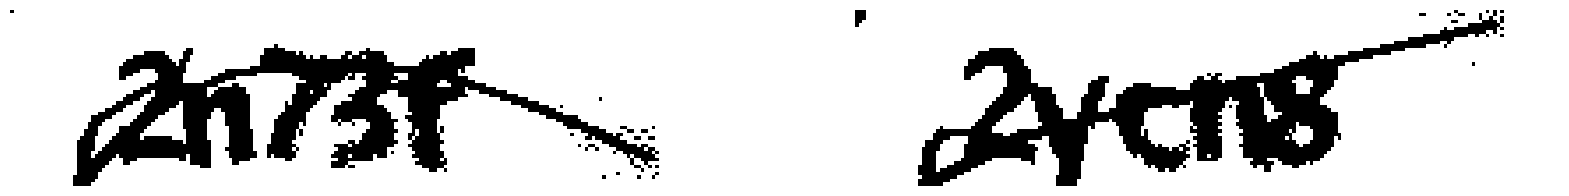

In [7]:
plot_(thresh_img1, thresh_img2) 

In [8]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

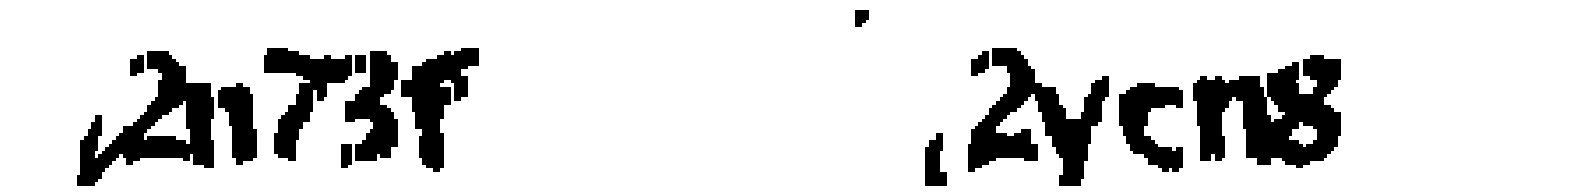

In [9]:
plot_(close_img1, close_img2)

In [10]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

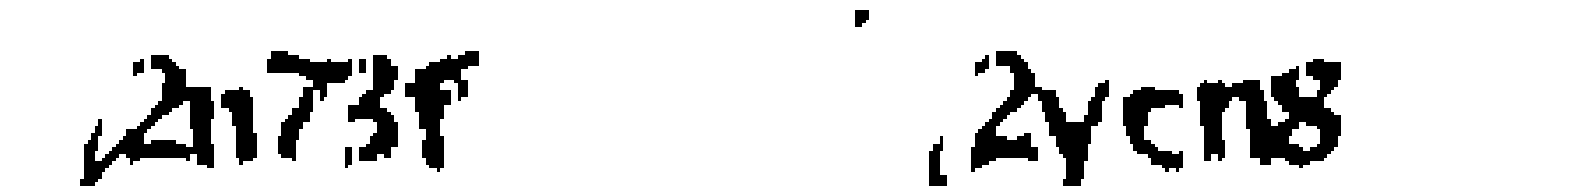

In [11]:
plot_(dilate_img1, dilate_img2)

In [12]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

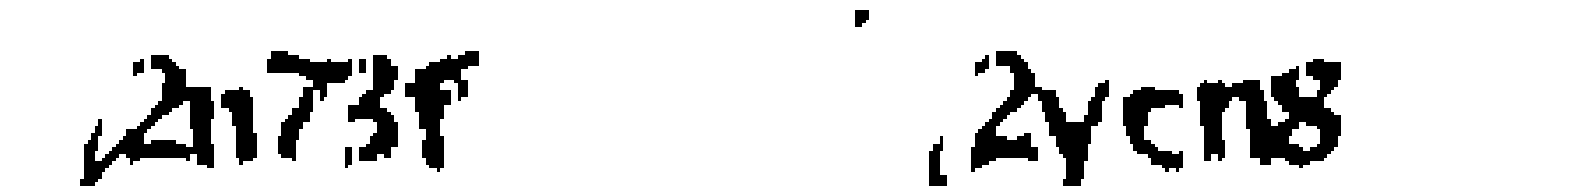

In [13]:
plot_(gauss_img1, gauss_img2)

In [14]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

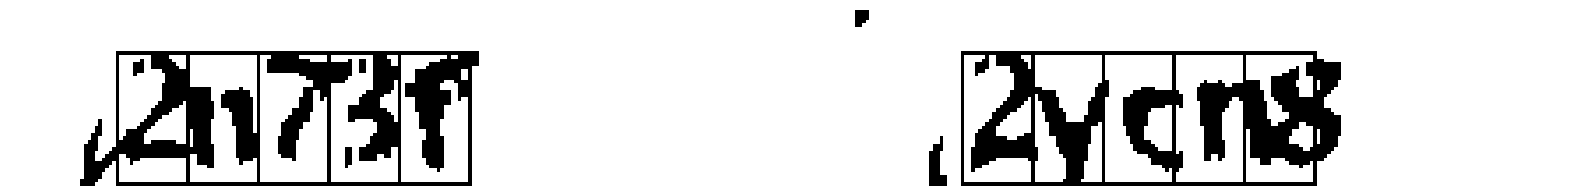

In [15]:
plot_(gauss_img1, gauss_img2)

In [16]:
path = 'C:/Users/MYTHILI/Downloads/archive (5)/samples/samples'

In [17]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [18]:
import os
from PIL import Image
import keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

X = []
y = []

for image in os.listdir(path) :
    
    if image[6:] != 'png' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [21]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [22]:
X /= 255.0

[]

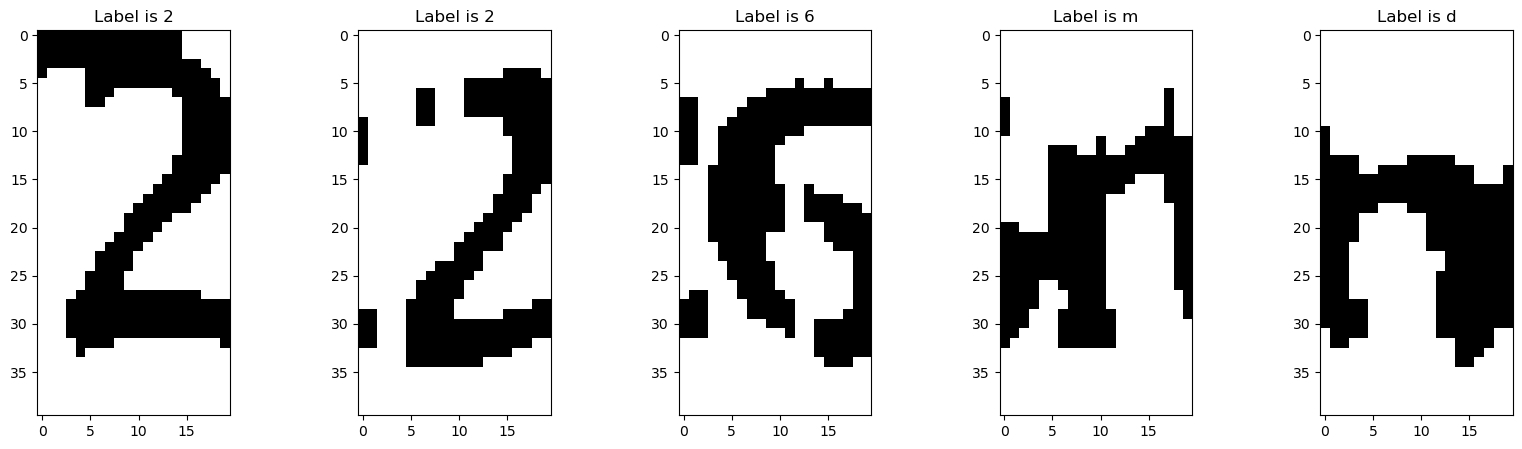

In [23]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [24]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of 7 : 258
Occurance count of n : 525
Occurance count of y : 232
Occurance count of m : 275
Occurance count of w : 235
Occurance count of c : 262
Occurance count of g : 271
Occurance count of 3 : 267
Occurance count of 5 : 281
Occurance count of e : 235
Occurance count of f : 271
Occurance count of p : 253
Occurance count of 6 : 259
Occurance count of 4 : 284
Occurance count of 8 : 264
Occurance count of b : 240
Occurance count of d : 259
Occurance count of x : 264
Occurance count of 2 : 265


In [25]:
temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

C:\Users\MYTHILI\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : 2
label : 0
Count : 265


In [28]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [29]:
print(X.shape)
print(y_one_hot.shape) 

(5200, 40, 20, 1)
(5200, 19)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [32]:
y_temp = np.argmax(y_test, axis = 1)

Text(0.5, 1.0, 'Label distribution in test set')

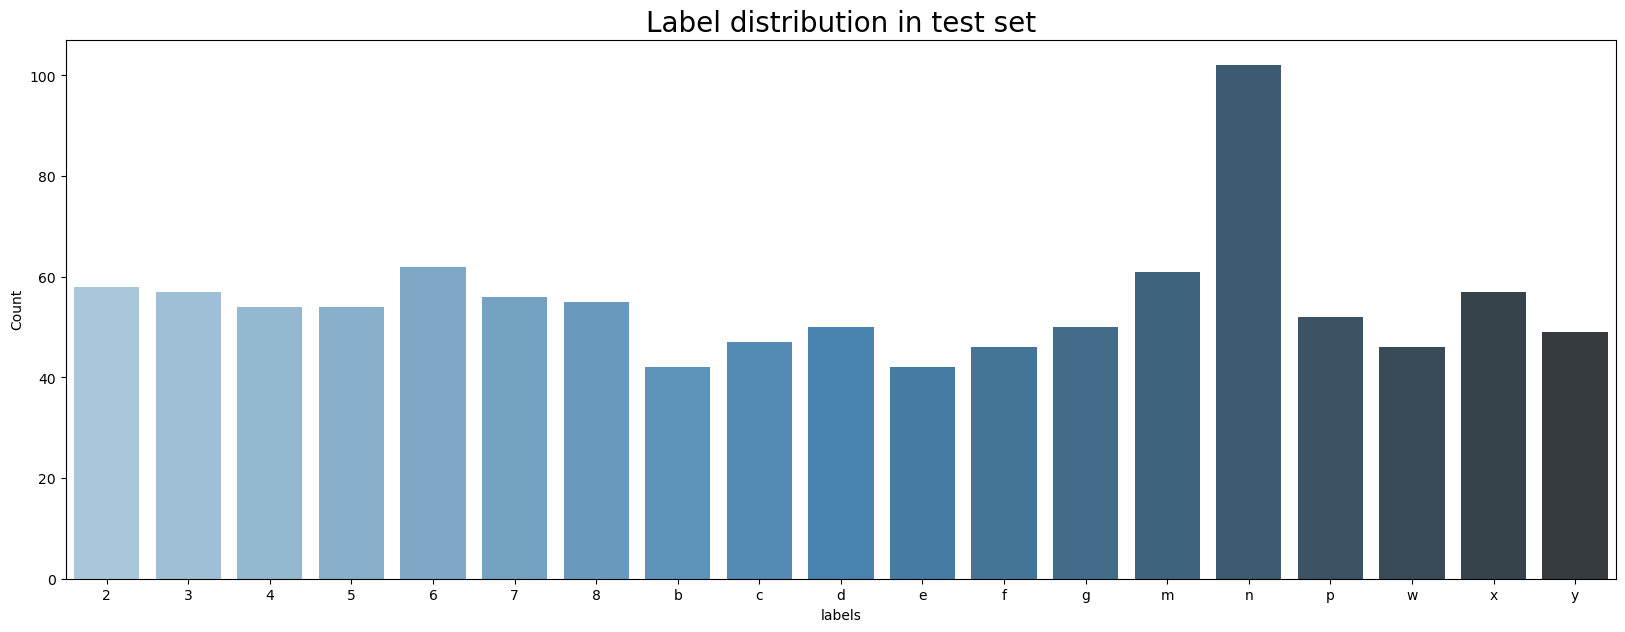

In [33]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

In [34]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [35]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [36]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

In [37]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [38]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(19, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [39]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [40]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [41]:
print(X_train.shape)
print(y_train.shape)

(8037, 800)
(8037, 19)


In [42]:
X_train = np.reshape(X_train, (8037, 40, 20, 1))

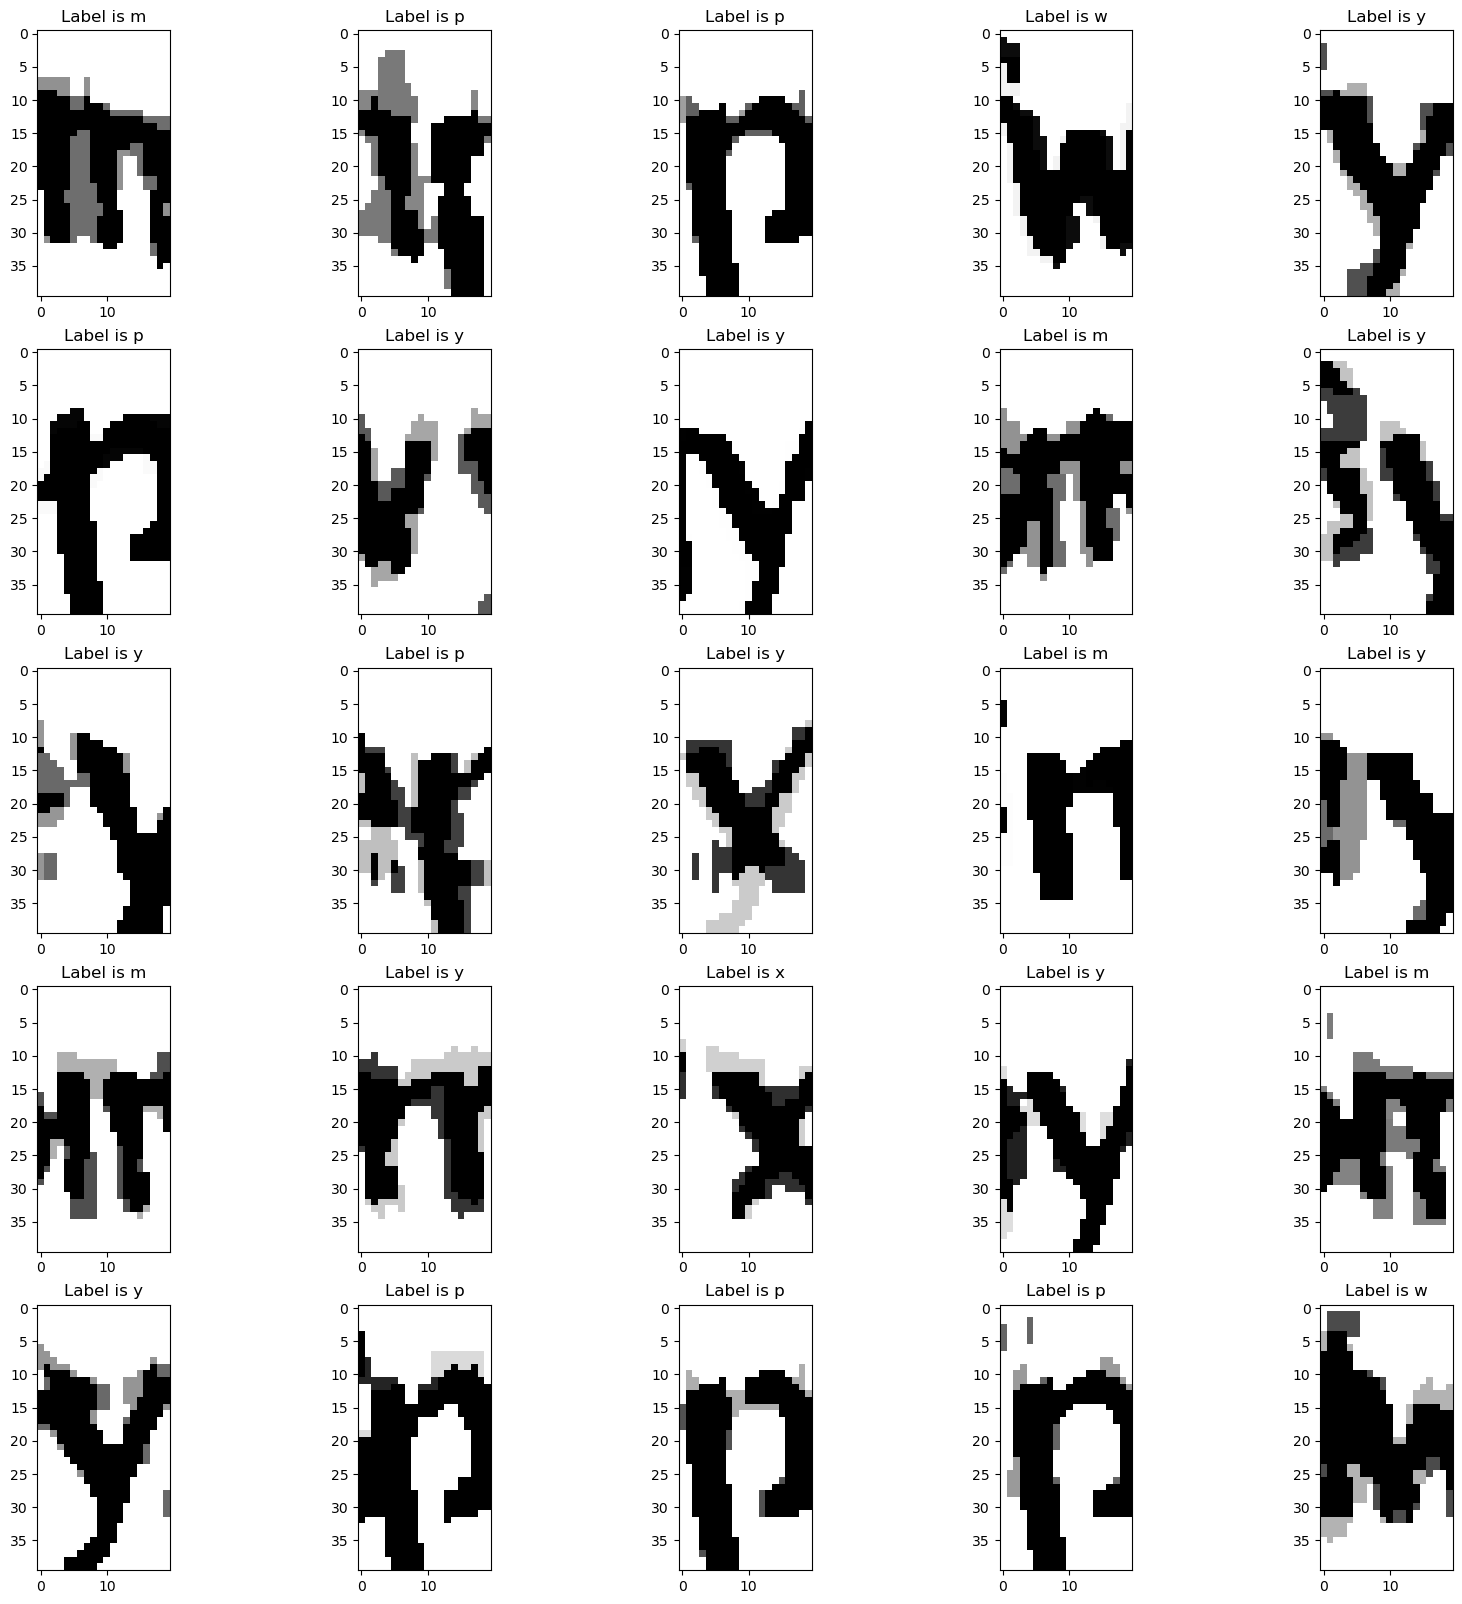

In [43]:
plt.figure(figsize = (20,20))

hi = 8000
lo = 7000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

In [44]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)
train_set = traingen.flow(X_train, y_train)
trainX, trainy = train_set.next()

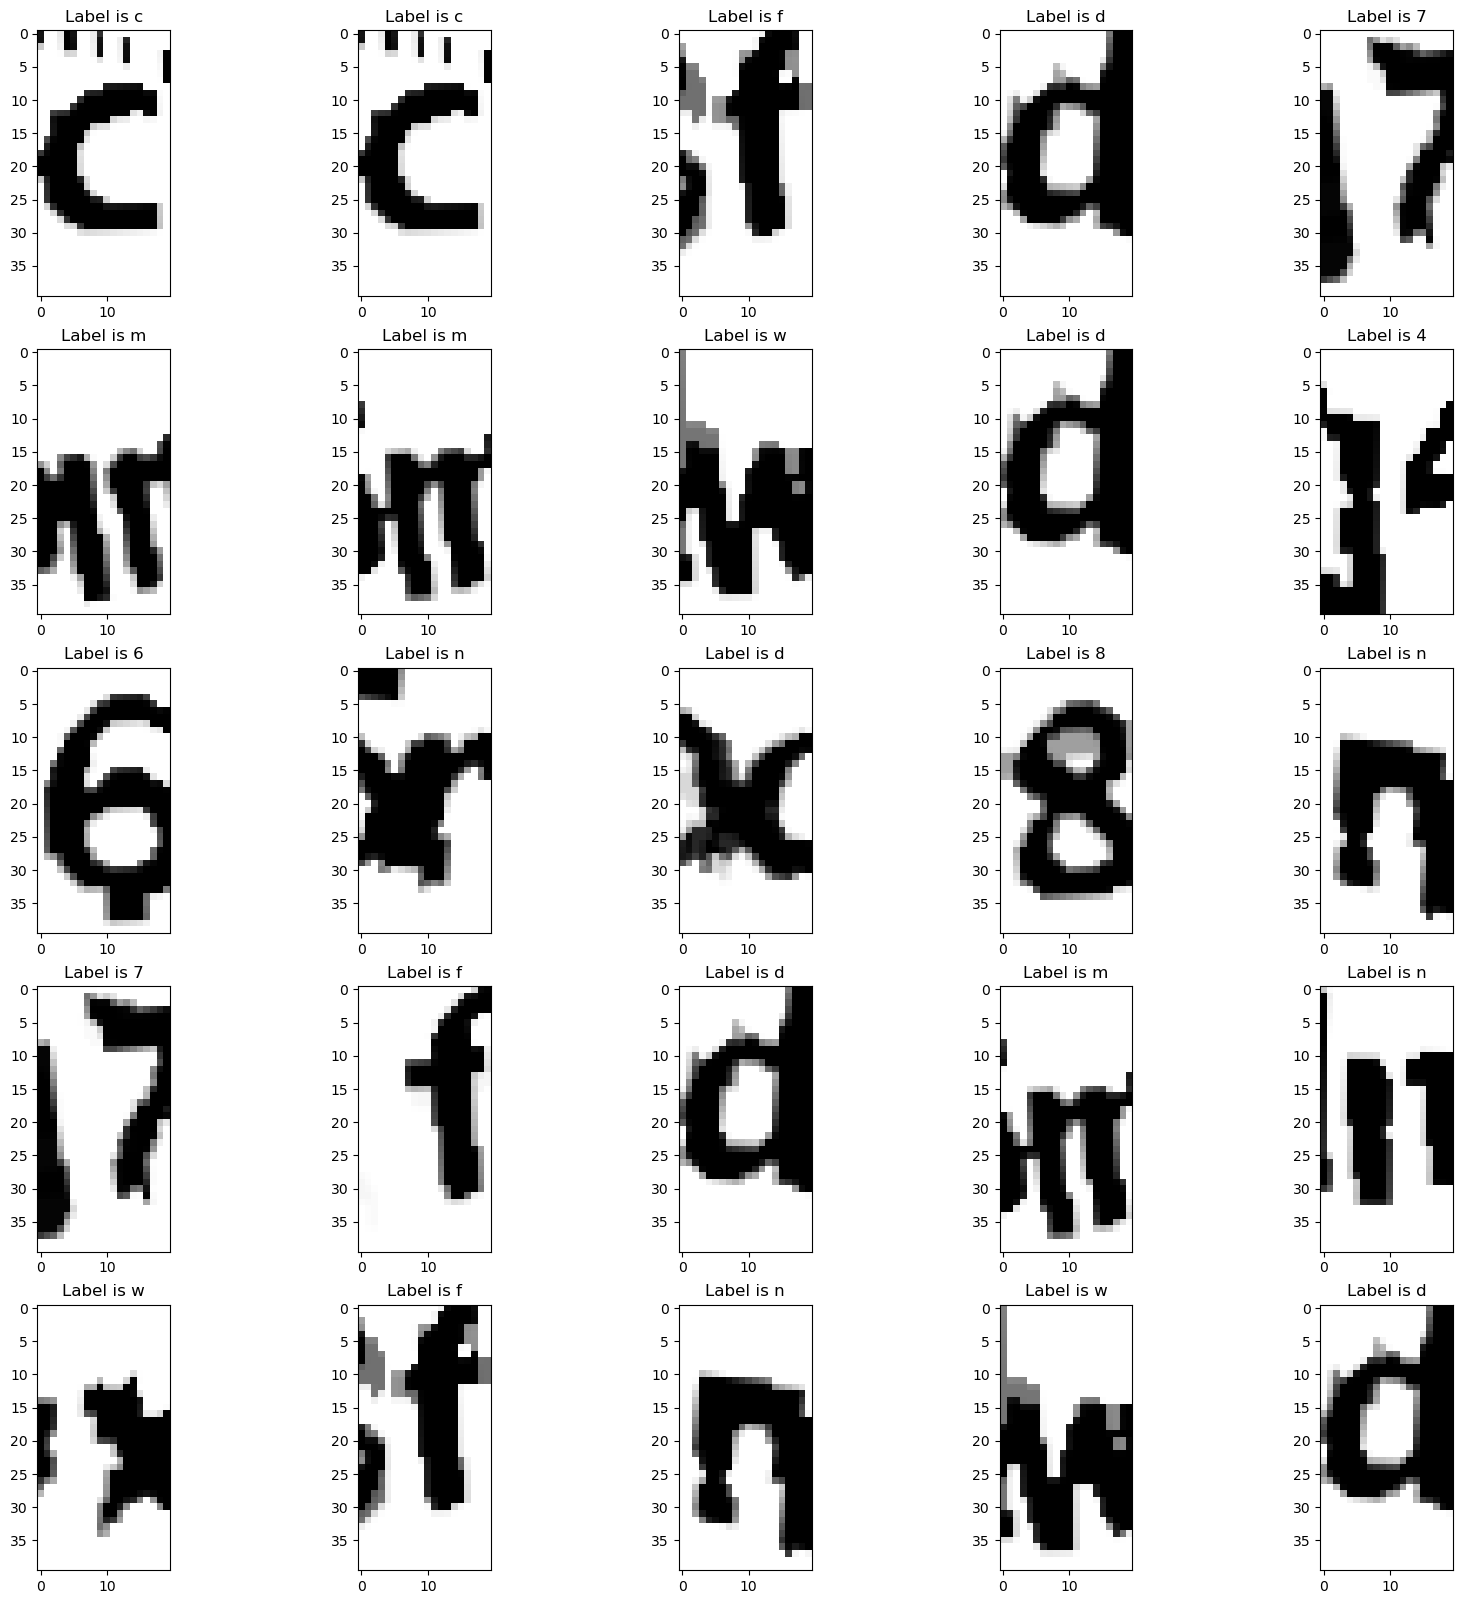

In [45]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

In [46]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 20, 10, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 10, 5, 32)         37024     
                                                                 
 sequential_3 (Sequential)   (None, 5, 3, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 240)               0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                7840      
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 19)                6

In [47]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)
print(X_train.shape)
print(y_train.shape)

(8037, 40, 20, 1)
(8037, 19)


In [48]:
history = model.fit(traingen.flow(X_train, y_train, batch_size = 32), validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/150
252/251 [==============================] - ETA: 0s - loss: 2.3415 - accuracy: 0.3124
Epoch 1: val_loss improved from inf to 2.83188, saving model to .\result_model.h5
251/251 [==============================] - 68s 220ms/step - loss: 2.3415 - accuracy: 0.3124 - val_loss: 2.8319 - val_accuracy: 0.0740
Epoch 2/150
252/251 [==============================] - ETA: 0s - loss: 1.3434 - accuracy: 0.6157
Epoch 2: val_loss improved from 2.83188 to 1.14082, saving model to .\result_model.h5
251/251 [==============================] - 47s 187ms/step - loss: 1.3434 - accuracy: 0.6157 - val_loss: 1.1408 - val_accuracy: 0.7240
Epoch 3/150
252/251 [==============================] - ETA: 0s - loss: 0.9759 - accuracy: 0.7261
Epoch 3: val_loss improved from 1.14082 to 0.67663, saving model to .\result_model.h5
251/251 [==============================] - 46s 182ms/step - loss: 0.9759 - accuracy: 0.7261 - val_loss: 0.6766 - val_accuracy: 0.8240
Epoch 4/150
252/251 [==============================] 

In [49]:
from keras.models import load_model
pred = model.predict(X_test)

33/33 [==============================] - 12s 33ms/step


In [50]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)
from sklearn.metrics import accuracy_score, classification_report
target_name = []
for i in sorted(info) :
    target_name.append(info[i])
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [51]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.9
              precision    recall  f1-score   support

           2       0.90      0.95      0.92        58
           3       0.96      0.95      0.96        57
           4       0.94      0.91      0.92        54
           5       0.93      0.94      0.94        54
           6       1.00      0.87      0.93        62
           7       0.98      0.93      0.95        56
           8       1.00      0.95      0.97        55
           b       0.93      0.98      0.95        42
           c       0.89      0.89      0.89        47
           d       0.90      0.90      0.90        50
           e       0.84      0.88      0.86        42
           f       0.96      0.93      0.95        46
           g       0.98      0.98      0.98        50
           m       0.72      0.56      0.63        61
           n       0.72      0.89      0.80       102
           p       0.94      0.92      0.93        52
           w       0.85      0.87      0.86        46
           x

In [52]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

In [ ]:
get_demo('C:/Users/MYTHILI/Desktop/CAPTCHA/23mdg.png')
